In [ ]:
# pip install birdnet

Note: you may need to restart the kernel to use updated packages.


In [51]:
import os
from pathlib import Path

import csv
from birdnet import (SpeciesPredictions,
                     predict_species_within_audio_file,
                     predict_species_within_audio_files_mp,
                     predict_species_at_location_and_time
)
import matplotlib.pyplot as plt
import pandas as pd


In [16]:
import warnings
warnings.filterwarnings('ignore')

### Prediction of species based on location

In [17]:
species_list = predict_species_at_location_and_time(
    40, -105
)
species_list

OrderedDict([('Junco hyemalis_Dark-eyed Junco', 0.9457705),
             ('Turdus migratorius_American Robin', 0.92063683),
             ('Sturnella neglecta_Western Meadowlark', 0.8942344),
             ('Zenaida macroura_Mourning Dove', 0.86820287),
             ('Colaptes auratus_Northern Flicker', 0.8363716),
             ('Agelaius phoeniceus_Red-winged Blackbird', 0.8011299),
             ('Anas platyrhynchos_Mallard', 0.7941799),
             ('Streptopelia decaocto_Eurasian Collared-Dove', 0.78982854),
             ('Branta canadensis_Canada Goose', 0.786757),
             ('Sturnus vulgaris_European Starling', 0.7758931),
             ('Passer domesticus_House Sparrow', 0.74194473),
             ('Corvus corax_Common Raven', 0.7416215),
             ('Buteo jamaicensis_Red-tailed Hawk', 0.74078715),
             ('Setophaga coronata_Yellow-rumped Warbler', 0.72289616),
             ('Hirundo rustica_Barn Swallow', 0.72025776),
             ('Zonotrichia leucophrys_White-crowne

In [44]:
species_temp = []

for species, confidence in species_list.items():
    species_dict = {'Species': species,
         'Confidence': round(confidence, 2)}
    species_temp.append(species_dict)

species_location_df = pd.DataFrame(species_temp, 
                                   columns=['Species', 'Confidence'])

species_location_df

,Species,Confidence
0,Junco hyemalis_Dark-eyed Junco,0.95
1,Turdus migratorius_American Robin,0.92
2,Sturnella neglecta_Western Meadowlark,0.89
3,Zenaida macroura_Mourning Dove,0.87
4,Colaptes auratus_Northern Flicker,0.84
...,...,...
259,Passerella iliaca_Fox Sparrow,0.03
260,Plectrophenax nivalis_Snow Bunting,0.03
261,Melozone fusca_Canyon Towhee,0.03
262,Anthus spragueii_Sprague's Pipit,0.03


<Axes: title={'center': 'Likelyhood of the 5 Most Common Birds'}, xlabel='Species'>

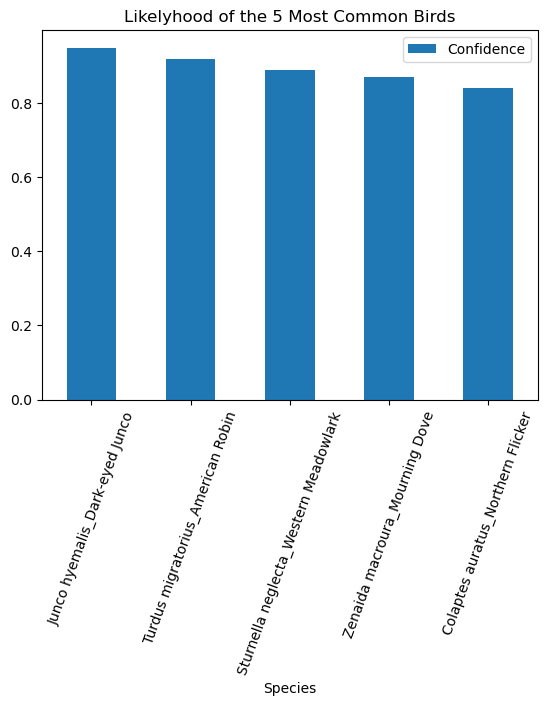

In [90]:
species_location_df.head(5).plot.bar(x='Species', rot=70, 
            title='Likelyhood of the 5 Most Common Birds')

### Prediction of species based on a single audio file

In [36]:
# predict species within the whole audio file
audio_path = Path("../data/raw/audio_data/CP1-007_20240701_193800.wav")

predictions = SpeciesPredictions(predict_species_within_audio_file(audio_path))

Predicting species: 100%|██████████| 3600/3600 [00:43<00:00, 82.66s/s] 


In [ ]:
# View structure of results 
predictions

OrderedDict([((0.0, 3.0), OrderedDict()),
             ((3.0, 6.0), OrderedDict()),
             ((6.0, 9.0), OrderedDict()),
             ((9.0, 12.0), OrderedDict()),
             ((12.0, 15.0), OrderedDict()),
             ((15.0, 18.0),
              OrderedDict([('Setophaga coronata_Yellow-rumped Warbler',
                            0.21827158),
                           ('Setophaga nigrescens_Black-throated Gray Warbler',
                            0.13906908),
                           ('Setophaga occidentalis_Hermit Warbler',
                            0.12740059)])),
             ((18.0, 21.0), OrderedDict()),
             ((21.0, 24.0),
              OrderedDict([('Buteo brachyurus_Short-tailed Hawk',
                            0.12841704)])),
             ((24.0, 27.0), OrderedDict()),
             ((27.0, 30.0), OrderedDict()),
             ((30.0, 33.0), OrderedDict()),
             ((33.0, 36.0), OrderedDict()),
             ((36.0, 39.0), OrderedDict()),
          

#### Success
The function returns a nested OrderedDict, with the time interval as the key and the species and confidence rating as the value.
From here, we can loop through the OrderedDict to isolate the time, species, and confidence value. In the future, these values will be organized into rows of a CSV file, but for now we'll generate a print statement.

In [40]:
# Loop through first tier OrderedDict
for time, pred_dict in list(predictions.items()):
    # Loop through second tier OrderedDict
    for prediction, confidence in pred_dict.items():
        print(f"{time}: Predicted {prediction}"
            f"with a confidence of {confidence:.2}")

(15.0, 18.0): Predicted Setophaga coronata_Yellow-rumped Warblerwith a confidence of 0.22
(15.0, 18.0): Predicted Setophaga nigrescens_Black-throated Gray Warblerwith a confidence of 0.14
(15.0, 18.0): Predicted Setophaga occidentalis_Hermit Warblerwith a confidence of 0.13
(21.0, 24.0): Predicted Buteo brachyurus_Short-tailed Hawkwith a confidence of 0.13
(42.0, 45.0): Predicted Setophaga magnolia_Magnolia Warblerwith a confidence of 0.67
(45.0, 48.0): Predicted Setophaga coronata_Yellow-rumped Warblerwith a confidence of 0.33
(69.0, 72.0): Predicted Setophaga nigrescens_Black-throated Gray Warblerwith a confidence of 0.25
(69.0, 72.0): Predicted Geothlypis philadelphia_Mourning Warblerwith a confidence of 0.2
(69.0, 72.0): Predicted Setophaga magnolia_Magnolia Warblerwith a confidence of 0.17
(72.0, 75.0): Predicted Setophaga nigrescens_Black-throated Gray Warblerwith a confidence of 0.18
(111.0, 114.0): Predicted Buteo brachyurus_Short-tailed Hawkwith a confidence of 0.16
(117.0, 12

### Prediction of species from multiple audio files
#### Attempt 1

In [27]:
# predict species within the whole audio file
audio_paths = list([
    Path("../data/raw/audio_data/CP1-007_20240701_193800.wav"),
    Path("../data/raw/audio_data/CP1-007_20240702_053702.wav")
])

audio_paths

[WindowsPath('../data/raw/audio_data/CP1-007_20240701_193800.wav'),
 WindowsPath('../data/raw/audio_data/CP1-007_20240702_053702.wav')]

In [28]:
predictions = predict_species_within_audio_files_mp(audio_paths)

predictions

<generator object predict_species_within_audio_files_mp at 0x00000298B9E4A440>

In [ ]:
# list(predictions)

# Returns:
# TypeError: cannot pickle 'tensorflow.lite.python.interpreter_wrapper._pywrap_tensorflow_interpreter_wrapper.InterpreterWrapper' object

Predicting species:   0%|          | 0/2 [00:05<?, ?file/s]


TypeError: cannot pickle 'tensorflow.lite.python.interpreter_wrapper._pywrap_tensorflow_interpreter_wrapper.InterpreterWrapper' object

#### Attempt 2
Determine if the function works with just one audio file.

In [ ]:
# predict species within the whole audio file
audio_paths = [Path("../data/raw/audio_data/CP1-007_20240701_193800.wav")]

audio_paths

[WindowsPath('audio_data/CP1-007_20240701_193800.wav')]

In [22]:
predictions = predict_species_within_audio_files_mp(audio_paths)

predictions

<generator object predict_species_within_audio_files_mp at 0x0000023B57BEA040>

In [ ]:
# list(predictions)
# ---
# Returns
# TypeError: cannot pickle 'tensorflow.lite.python.interpreter_wrapper._pywrap_tensorflow_interpreter_wrapper.InterpreterWrapper' object

Predicting species:   0%|          | 0/1 [00:05<?, ?file/s]


TypeError: cannot pickle 'tensorflow.lite.python.interpreter_wrapper._pywrap_tensorflow_interpreter_wrapper.InterpreterWrapper' object

### Looping with the single file function

In [ ]:
# Establish empty dictionary to write results to
result_dict = {}

# Establist directory to obtain audio files from
audio_data_path = '../data/raw/audio_data'

for file in os.listdir(audio_data_path):
    # Generate file path
    file_path = Path(f'{audio_data_path}/{os.path.basename(file)}')
    # Run BirdNET artificial neural network
    result = SpeciesPredictions(predict_species_within_audio_file(file_path))
    # File name for metadata
    file_name = os.path.basename(file_path)
    # Add to dictionary
    result_dict[f'{file_name}'] = result

Predicting species: 100%|██████████| 3598/3598 [00:43<00:00, 82.17s/s] 


#### Success!



In [84]:
result_dict

{'CP1-007_20240701_193800.wav': OrderedDict([((0.0, 3.0), OrderedDict()),
              ((3.0, 6.0), OrderedDict()),
              ((6.0, 9.0), OrderedDict()),
              ((9.0, 12.0), OrderedDict()),
              ((12.0, 15.0), OrderedDict()),
              ((15.0, 18.0),
               OrderedDict([('Setophaga coronata_Yellow-rumped Warbler',
                             0.21827158),
                            ('Setophaga nigrescens_Black-throated Gray Warbler',
                             0.13906908),
                            ('Setophaga occidentalis_Hermit Warbler',
                             0.12740059)])),
              ((18.0, 21.0), OrderedDict()),
              ((21.0, 24.0),
               OrderedDict([('Buteo brachyurus_Short-tailed Hawk',
                             0.12841704)])),
              ((24.0, 27.0), OrderedDict()),
              ((27.0, 30.0), OrderedDict()),
              ((30.0, 33.0), OrderedDict()),
              ((33.0, 36.0), OrderedDict()),
   

In [85]:
results_temp = []

for file, result in result_dict.items():
    # Loop through first tier OrderedDict
    for time, pred_dict in list(result.items()):
        # Loop through second tier OrderedDict
        for species, confidence in pred_dict.items():
            species_dict = {'File Name': file,
                            'Time': time,
                            'Species': species,
                            'Confidence': round(confidence, 2)}
            results_temp.append(species_dict)

result_species_df = pd.DataFrame(results_temp, 
                                   columns=['File Name',
                                            'Time',
                                            'Species', 
                                            'Confidence'])

result_species_df

,File Name,Time,Species,Confidence
0,CP1-007_20240701_193800.wav,"(15.0, 18.0)",Setophaga coronata_Yellow-rumped Warbler,0.22
1,CP1-007_20240701_193800.wav,"(15.0, 18.0)",Setophaga nigrescens_Black-throated Gray Warbler,0.14
2,CP1-007_20240701_193800.wav,"(15.0, 18.0)",Setophaga occidentalis_Hermit Warbler,0.13
3,CP1-007_20240701_193800.wav,"(21.0, 24.0)",Buteo brachyurus_Short-tailed Hawk,0.13
4,CP1-007_20240701_193800.wav,"(42.0, 45.0)",Setophaga magnolia_Magnolia Warbler,0.67
...,...,...,...,...
1019,CP1-007_20240702_053702.wav,"(1911.0, 1914.0)",Botaurus stellaris_Great Bittern,0.10
1020,CP1-007_20240702_053702.wav,"(3102.0, 3105.0)",Palmeria dolei_Akohekohe,0.29
1021,CP1-007_20240702_053702.wav,"(3105.0, 3108.0)",Palmeria dolei_Akohekohe,0.11
1022,CP1-007_20240702_053702.wav,"(3531.0, 3534.0)",Palmeria dolei_Akohekohe,0.15


In [86]:
result_species_df.sort_values('Confidence', ascending=0)

,File Name,Time,Species,Confidence
256,CP1-007_20240701_193800.wav,"(1620.0, 1623.0)",Corthylio calendula_Ruby-crowned Kinglet,0.98
920,CP1-007_20240702_053702.wav,"(1146.0, 1149.0)",Melospiza lincolnii_Lincoln's Sparrow,0.96
15,CP1-007_20240701_193800.wav,"(153.0, 156.0)",Melospiza lincolnii_Lincoln's Sparrow,0.96
807,CP1-007_20240702_053702.wav,"(705.0, 708.0)",Melospiza lincolnii_Lincoln's Sparrow,0.95
20,CP1-007_20240701_193800.wav,"(186.0, 189.0)",Setophaga nigrescens_Black-throated Gray Warbler,0.95
...,...,...,...,...
705,CP1-007_20240702_053702.wav,"(249.0, 252.0)",Setophaga coronata_Yellow-rumped Warbler,0.10
268,CP1-007_20240701_193800.wav,"(1665.0, 1668.0)",Haemorhous purpureus_Purple Finch,0.10
267,CP1-007_20240701_193800.wav,"(1665.0, 1668.0)",Pinicola enucleator_Pine Grosbeak,0.10
50,CP1-007_20240701_193800.wav,"(348.0, 351.0)",Picoides dorsalis_American Three-toed Woodpecker,0.10


In [91]:
result_summary = (
    result_species_df.groupby(['Species'])  
    .agg({'File Name':'count', 'Confidence':'mean'})
    .rename(columns={'File Name':'Count'})
    .sort_values('Count', ascending=0)
)
result_summary

,Count,Confidence
Species,,
Setophaga coronata_Yellow-rumped Warbler,242,0.258884
Corthylio calendula_Ruby-crowned Kinglet,154,0.405325
Picoides dorsalis_American Three-toed Woodpecker,120,0.148083
Melospiza lincolnii_Lincoln's Sparrow,66,0.389394
Catharus guttatus_Hermit Thrush,56,0.266071
...,...,...
Phylloscopus proregulus_Pallas's Leaf Warbler,1,0.110000
Poecile montanus_Willow Tit,1,0.130000
Poecile palustris_Marsh Tit,1,0.110000


<Axes: title={'center': 'Mean Confidence Rating of Top 5 Species Identified'}, xlabel='Species'>

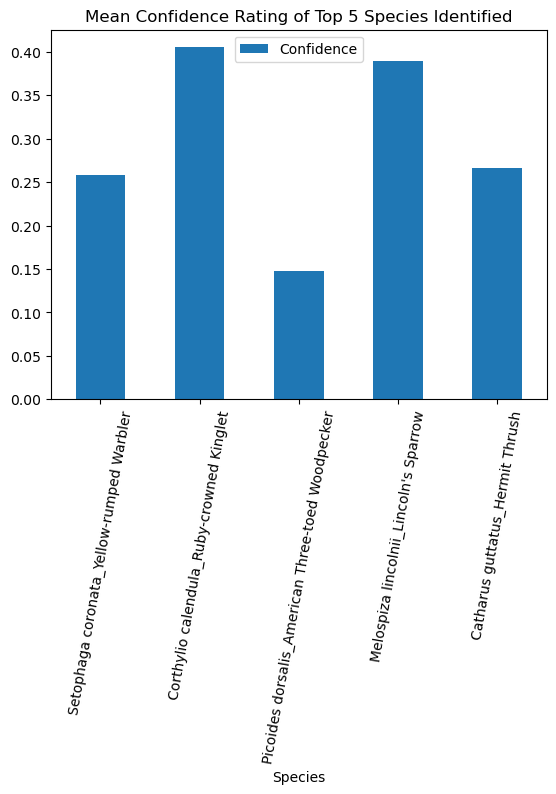

In [ ]:
result_summary.head(5).plot.bar(y='Confidence',rot=80,
            title='Mean Confidence Rating of Top 5 Species Identified')